<a href="https://colab.research.google.com/github/nissrine41/AliExpress-Product-Insights-An-Analytical-Dashboard/blob/main/tp_RS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Créer le réseau sémantique de concepts et relations
python
Copier le code



In [2]:
import networkx as nx

G = nx.DiGraph()

relations = [
    ("chien", "animal", "est un"),
    ("chien", "viande", "mange"),
    ("viande", "nourriture", "est un"),
    ("chat", "animal", "est un"),
    ("animal", "être vivant", "est un"),
    ("être vivant", "respirer", "a besoin de")
]

for source, target, relation in relations:
    G.add_node(source)
    G.add_node(target)
    G.add_edge(source, target, label=relation)


2) Visualiser le réseau sémantique avec des étiquettes pour les concepts et les relations
python
Copier le code


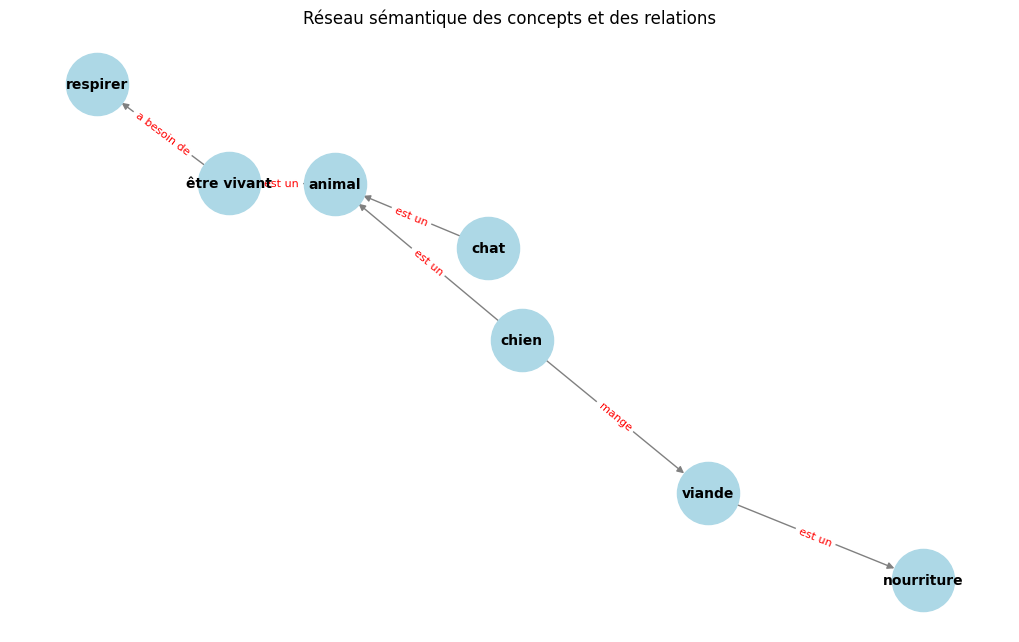

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", font_size=8)

plt.title("Réseau sémantique des concepts et des relations")
plt.show()


3) Rechercher des connexions entre certains concepts (comme trouver les relations associées au concept "chien")
python
Copier le code


In [5]:
def find_connections(graph, concept):
    connections = []
    for neighbor in graph.neighbors(concept):
        relation = graph[concept][neighbor]["label"]
        connections.append((concept, relation, neighbor))
    return connections

print("Relations associées au concept 'chien' :")
for connection in find_connections(G, "chien"):
    print(f"{connection[0]} {connection[1]} {connection[2]}")
if G.has_edge("chien", "animal"):
    relation = G["chien"]["animal"]["label"]
    print(f"La relation entre 'chien' et 'animal' est : '{relation}'")
else:
    print("Aucune relation entre 'chien' et 'animal' n'a été trouvée.")



Relations associées au concept 'chien' :
chien est un animal
chien mange viande
La relation entre 'chien' et 'animal' est : 'est un'
